In [1]:
import pandas as pd

In [2]:
dset = pd.read_csv("./dummy_dataset_clustering.csv", sep=";")

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.cluster import KMeans #documentation https://scikit-learn.org/stable/modules/clustering.html#
import numpy as np

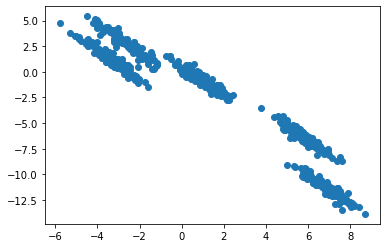

In [6]:
dset.head()                                    # print some dataset's records
plt.scatter(dset.iloc[:, 0], dset.iloc[:, 1])  # plot the dataset in a 2d space, clearly 5 clusters

In [7]:
my_data = dset.to_numpy()  # trasform the data in numpy array for training


kmeans = KMeans(5)   # create Kmeans model
kmeans.fit(my_data)  # fit the model

KMeans(n_clusters=5)

In [76]:
# creating a function for build kmeans models (?)
def build_kmeans(n_clusters, data, init='k-means++', n_init=10, max_iter=300, random_state=69):
    kmeans = KMeans(
        n_clusters=n_clusters, 
        init=init, 
        n_init=n_init, 
        max_iter=max_iter, 
        random_state=random_state
    )   # create Kmeans model
    
    kmeans.fit(data)  # fit the model
    
    return kmeans
    

In [22]:
kmeans3 = build_kmeans(3, my_data)

In [18]:
print(kmeans3)             # print the model

# print the centroids
centroids = kmeans3.cluster_centers_   
print(centroids)

KMeans(n_clusters=3, random_state=69)


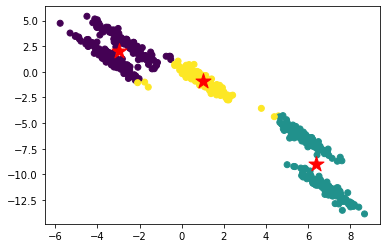

In [19]:
plt.scatter(my_data[:, 0], my_data[:, 1], c=kmeans3.labels_)               # plot the results
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=250, c='red')  # plot the centroids

KMeans(n_clusters=3, random_state=69)
[[  6.95695111 -11.38142848]
 [ -3.41920423   3.14557588]
 [ -2.53111374   0.89260335]
 [  5.75329493  -6.37263232]
 [  1.0156281   -0.86236281]]


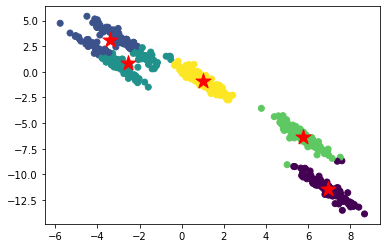

In [26]:
# build 5 kmeans
kmeans5 = build_kmeans(5, my_data)

# print the model
print(kmeans5)             

# calculate centroids
centroids = kmeans5.cluster_centers_   
print(centroids)

# plot the results
plt.scatter(my_data[:, 0], my_data[:, 1], c=kmeans5.labels_)               # plot the colored data
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=250, c='red')  # plot the centroids

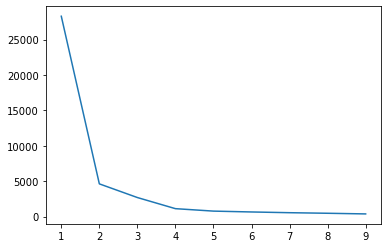

In [27]:
 #elbow method: useful to find the best k with respect SSE (also called inertia) 
error = []
for i in range(1, 10):
    kmeans = build_kmeans(i, my_data)
    error.append(kmeans.inertia_)
    
plt.plot(
    range(1, 10),   # x
    error           # y
)

KMeans(n_clusters=2, random_state=69)
[[-1.68677179  1.08436335]
 [ 6.36013825 -8.89790038]]


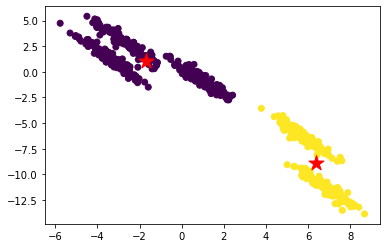

In [28]:
# build 5 kmeans
kmeans2 = build_kmeans(2, my_data)

# print the model
print(kmeans2)             

# calculate centroids
centroids = kmeans2.cluster_centers_   
print(centroids)

# plot the results
plt.scatter(my_data[:, 0], my_data[:, 1], c=kmeans2.labels_)               # plot the colored data
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=250, c='red')  # plot the centroids

KMeans(n_clusters=4, random_state=69)
[[ -2.99618065   2.05314449]
 [  5.75329493  -6.37263232]
 [  0.93204595  -0.85319892]
 [  6.95695111 -11.38142848]]


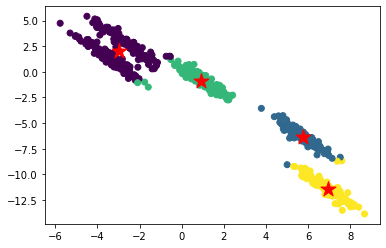

In [29]:
# build 5 kmeans
kmeans4 = build_kmeans(4, my_data)

# print the model
print(kmeans4)             

# calculate centroids
centroids = kmeans4.cluster_centers_   
print(centroids)

# plot the results
plt.scatter(my_data[:, 0], my_data[:, 1], c=kmeans4.labels_)               # plot the colored data
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=250, c='red')  # plot the centroids

In [30]:
# try with DBSCAN
from sklearn.cluster import DBSCAN

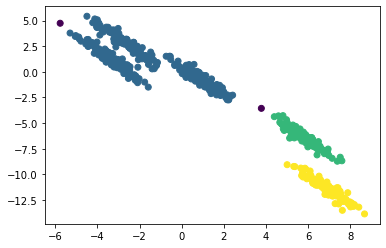

In [34]:
# too large esp and min_samples
dbscan = DBSCAN(eps=1, min_samples=5)    # create model
dbscan.fit(my_data)                      # fit the model

plt.scatter(my_data[:, 0], my_data[:, 1], c=dbscan.labels_)               # plot the colored data

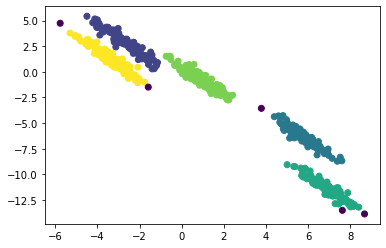

In [50]:
# good solution
dbscan = DBSCAN(eps=.5, min_samples=3)    # create model
dbscan.fit(my_data)                       # fit the model

plt.scatter(my_data[:, 0], my_data[:, 1], c=dbscan.labels_)       # plot the colored data

In [64]:
# different dataset with a circular shape (?)
dset2 = pd.read_csv("./blob_data2D_v3.csv", sep=",")
my_data2 = dset2.to_numpy()

In [65]:
dset2.head()

,Unnamed: 0,0,1
0,0,0.087641,7.401581
1,1,0.679869,6.417878
2,2,-3.167493,9.003850
3,3,3.570883,-2.653292
4,4,2.712693,-0.731479


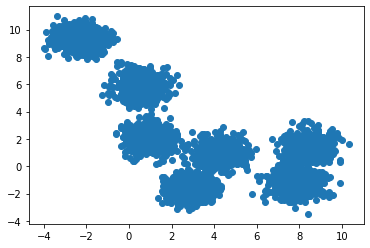

In [66]:
plt.scatter(my_data2[:, 1], my_data2[:, 2])

In [67]:
my_data2 = np.delete(my_data2, 0, axis=1)   # remove usles column (first column)
print(my_data2)

[[ 0.08764073  7.40158078]
 [ 0.67986892  6.4178778 ]
 [-3.16749304  9.00384995]
 ...
 [ 8.98656925  0.90114552]
 [ 7.81884094 -1.99381994]
 [ 6.83671607 -1.16994136]]


KMeans(n_clusters=7, random_state=69)
[[ 0.57207484  5.85119111]
 [ 7.83922511 -1.23999527]
 [ 4.27204615  0.94642273]
 [-2.32402986  9.27455262]
 [ 8.48537026  1.36983152]
 [ 2.90036054 -1.59495787]
 [ 0.91871011  2.02229847]]


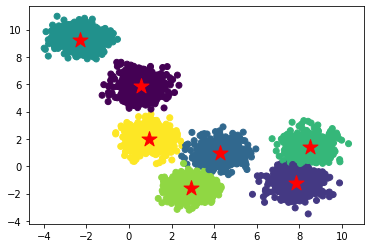

In [77]:
# build 5 kmeans
kmeans7 = build_kmeans(7, my_data2)

# print the model
print(kmeans7)             

# calculate centroids
centroids = kmeans7.cluster_centers_   
print(centroids)

# plot the results
plt.scatter(my_data2[:, 0], my_data2[:, 1], c=kmeans7.labels_)               # plot the colored data
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=250, c='red')    # plot the centroids

In [ ]:
# try with dbscan if it can recognize this clusters [ HOMEWORK ]

In [78]:
#Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering # https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html 

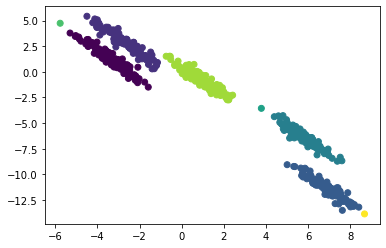

In [82]:
# my_data is difficult for this algorithm 
# complete cant resolve this problem !!

# generate and train the model with my_data (first dataset)
agglom = AgglomerativeClustering(n_clusters=8, linkage='single')
y_agglom = agglom.fit_predict(my_data)

plt.scatter(my_data[:, 0], my_data[:, 1], c=y_agglom)   # plot the colored data

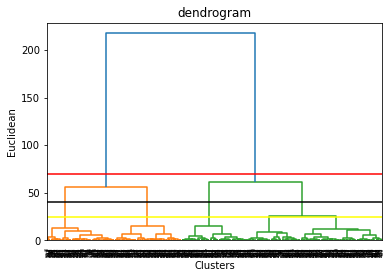

In [83]:
#Aglomerative clustering with scipy in order to visualize the dendogram

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram
import scipy.cluster.hierarchy as sch

d = sch.dendrogram (sch.linkage(my_data, method="ward"))
plt.title("dendrogram")
plt.xlabel("Clusters")
plt.ylabel("Euclidean")
plt.axhline(y = 70, color = "r", linestyle = "-")
plt.axhline(y = 40, color = "black", linestyle = "-")
plt.axhline(y = 25, color = "yellow", linestyle = "-")
plt.show()

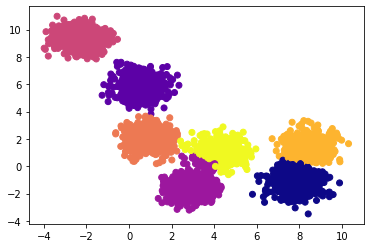

In [ ]:
# agglomerative with complete linkage for my_data2
from ...

Because K-maens knows nothing about the identity of the cluster, the 0-2 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

Now we can check how accurate our unsupervised clustering was in finding similar samples withing the data